# Exploring data notes

Key take-aways from this notebook:
- Churned customers represent 0.27 of the data
- Churned customers seem to pay more per month
- Churned customers seem to have a lower tenure
- The categories with the highest churn are those having to do with payment type/plan, and having to do with a basic service.  In particular Fiber Optic Internet
- Customers who churned sometimes did not have an additional serivce such as online backup, or device protection

In [100]:
import pandas as pd
import itertools
from scipy import stats
import acquire
import prepare

In [75]:
df = prepare.prep_telco(acquire.get_telco_data())

Returning saved csv file.


/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [76]:
train, validate, test = prepare.split_telco_data(df)
train

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,internet_service_type
4799,6743-HHQPF,Male,0,Yes,No,42,No,No phone service,No,No,...,No,No,No,Yes,25.10,1097.15,No,Month-to-month,Credit card (automatic),DSL
1006,1453-RZFON,Female,0,No,Yes,1,Yes,No,Yes,No,...,No,No,No,No,49.90,49.90,No,Month-to-month,Mailed check,DSL
4733,6664-FPDAC,Female,1,No,No,56,Yes,Yes,No,Yes,...,Yes,Yes,Yes,Yes,111.95,6418.90,Yes,One year,Electronic check,Fiber optic
5077,7134-MJPDY,Female,1,No,No,66,Yes,Yes,No,No,...,Yes,Yes,Yes,Yes,102.85,6976.75,No,One year,Credit card (automatic),Fiber optic
2864,4081-DYXAV,Female,0,No,No,19,No,No phone service,No,No,...,No,Yes,Yes,Yes,44.85,893.55,Yes,One year,Credit card (automatic),DSL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,9070-BCKQP,Female,0,Yes,No,72,Yes,Yes,Yes,No,...,Yes,Yes,Yes,Yes,110.15,7881.20,No,Two year,Credit card (automatic),Fiber optic
5479,7711-YIJWC,Male,0,Yes,Yes,61,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,84.90,5264.50,No,One year,Bank transfer (automatic),DSL
5025,7064-FRRSW,Male,1,No,No,48,Yes,Yes,No,Yes,...,No,Yes,Yes,Yes,99.00,4744.35,No,One year,Electronic check,Fiber optic
1356,2018-PZKMU,Male,0,Yes,Yes,9,Yes,No,No,No,...,Yes,Yes,Yes,No,103.10,970.45,No,Month-to-month,Electronic check,Fiber optic


## How many customers are churning?

In [77]:
gen_churn = (train.churn == 'Yes').mean()
gen_churn

0.2656845313690627

0.27 of all customers are churning

## What are the general characteristics of the data rows?

### Description of the numeric columns

In [78]:
train.describe().iloc[:,1:]

,tenure,monthly_charges,total_charges
count,3937.000000,3937.000000,3937.000000
mean,32.814834,65.350368,2307.465799
std,24.633327,29.932367,2267.985078
min,1.000000,18.550000,18.800000
25%,9.000000,38.500000,436.200000
50%,29.000000,70.800000,1416.750000
75%,56.000000,89.950000,3848.000000
max,72.000000,118.750000,8684.800000


Compare churned with not churned in the numeric columns

In [79]:
train.groupby('churn').describe().T

churn                           No          Yes
senior_citizen  count  2891.000000  1046.000000
                mean      0.133864     0.260994
                std       0.340565     0.439387
                min       0.000000     0.000000
                25%       0.000000     0.000000
                50%       0.000000     0.000000
                75%       0.000000     1.000000
                max       1.000000     1.000000
tenure          count  2891.000000  1046.000000
                mean     38.101349    18.203633
                std      24.065793    19.819415
                min       1.000000     1.000000
                25%      16.000000     2.000000
                50%      39.000000    10.000000
                75%      61.000000    28.000000
                max      72.000000    72.000000
monthly_charges count  2891.000000  1046.000000
                mean     61.828018    75.085660
                std      30.920317    24.522442
                min      18.550000    18.850000
                25%      25.250000    59.050000
                50%      64.950000    79.900000
                75%      88.800000    94.400000
                max     118.750000   117.800000
total_charges   count  2891.000000  1046.000000
                mean   2577.511155  1561.097610
                std    2316.819439  1941.684387
                min      18.800000    18.850000
                25%     612.200000   143.775000
                50%    1725.950000   739.100000
                75%    4263.425000  2276.437500
                max    8672.450000  8684.800000

Visualize these columns

<AxesSubplot:>

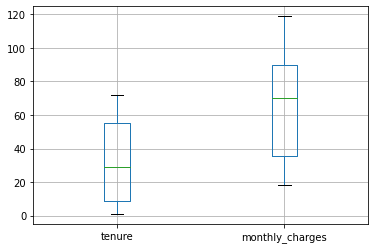

In [80]:
df.boxplot(column = ['tenure', 'monthly_charges'])

<AxesSubplot:>

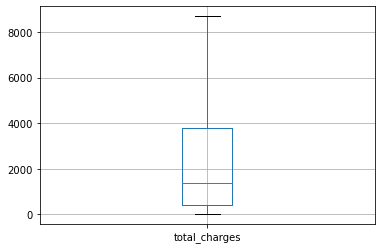

In [81]:
df.boxplot(column = 'total_charges')

Box plots for comparing churn and no churn

array([<AxesSubplot:title={'center':'tenure'}, xlabel='churn'>,
       <AxesSubplot:title={'center':'monthly_charges'}, xlabel='churn'>],
      dtype=object)

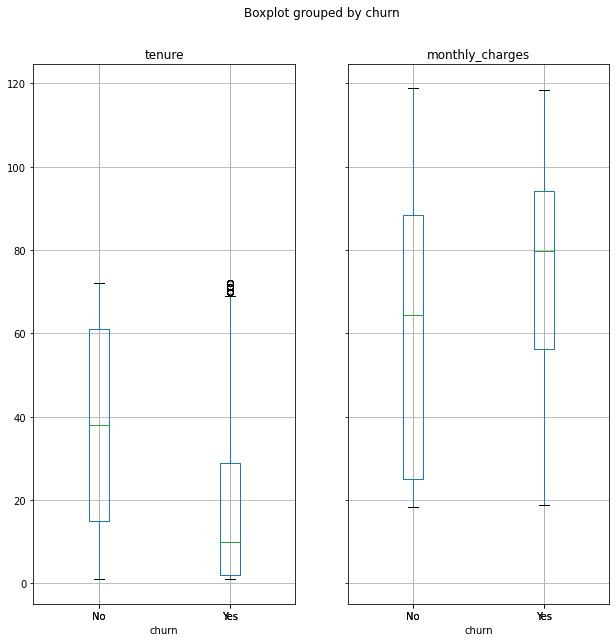

In [82]:
df.boxplot(column = ['tenure', 'monthly_charges'], by= 'churn', figsize=(10,10))

<AxesSubplot:title={'center':'total_charges'}, xlabel='churn'>

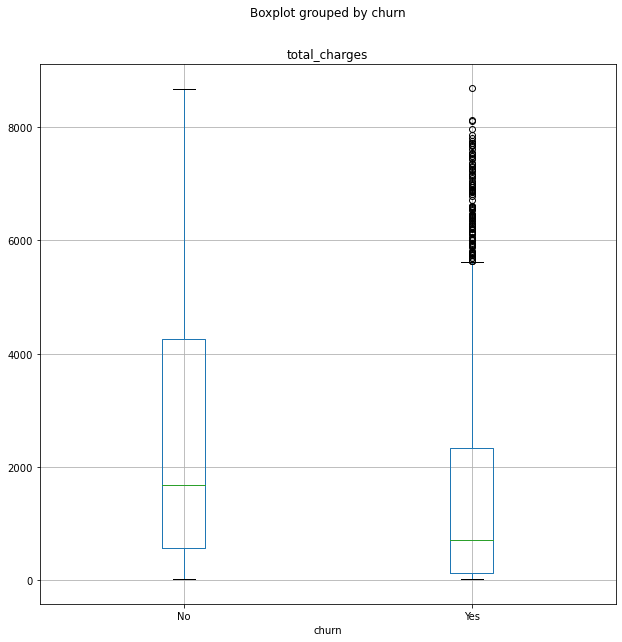

In [83]:
df.boxplot(column = ['total_charges'], by= 'churn', figsize=(10,10))

### Numeric Columns takeaways

- Churning customers have not been with the company for an average of 17 months, compared with 37 for other customers
- Churned customers pay more monthly and in total than non-churning customers

### Catagorical Columns Exploration

##### What is the percent churn in all of the categories? and what proportion of customers do each of these categories represent?

In [84]:
train[train['gender'] == 'Female'].shape[0]/train.shape[0]

0.4866649733299467

In [85]:
#get list of categorical data
cat_var = train.dtypes[train.dtypes == 'object'].index.to_list()
cat_var.remove('customer_id')
cat_var.append('senior_citizen')

#now get the proportion of churn for each one
outputs = []
for cat in cat_var:
    for subcat in list(train[cat].unique()):
        prop = (train[train[cat] == subcat].churn == 'Yes').mean()  
        sample_prop = train[train[cat] == subcat].shape[0]/train.shape[0]
        output = {
            'category':cat,
            'subcategory':subcat,
            'churn_rate':prop,
            'prop_in_sample': sample_prop
        }
        outputs.append(output)

In [86]:
churn_rates = pd.DataFrame(outputs)
churn_rates

,category,subcategory,churn_rate,prop_in_sample
0,gender,Male,0.263731,0.513335
1,gender,Female,0.267745,0.486665
2,partner,Yes,0.205607,0.489205
3,partner,No,0.323222,0.510795
4,dependents,No,0.307861,0.694691
5,dependents,Yes,0.169717,0.305309
6,phone_service,No,0.263021,0.097536
7,phone_service,Yes,0.265972,0.902464
8,multiple_lines,No phone service,0.263021,0.097536
9,multiple_lines,No,0.241770,0.470663


Which of these proportions are at least 0.10 above general churn?

In [87]:
high_churn_cats = churn_rates[churn_rates.churn_rate > gen_churn*1.1].sort_values('churn_rate')
high_churn_cats

,category,subcategory,churn_rate,prop_in_sample
10,multiple_lines,Yes,0.292353,0.431801
27,streaming_movies,Yes,0.295367,0.394717
24,streaming_tv,Yes,0.304718,0.387605
4,dependents,No,0.307861,0.694691
3,partner,No,0.323222,0.510795
23,streaming_tv,No,0.329560,0.403861
29,paperless_billing,Yes,0.337003,0.599949
26,streaming_movies,No,0.339309,0.396749
17,device_protection,No,0.387372,0.446533
14,online_backup,No,0.397143,0.444501


There seem to be two broad categories here: additional services (streaming movies, online backup, etc), and customer type (contract type, service types, demographic categories).

- Customer type categeories: these are ones that have the highest rates of churn over all the categories.  In particular, fiber optic customers, month-to-month customers, and electronic check customers are significant proportions of the sample and have high churn rates.
    - particular note is senior citizen.  They have a high churn rate, but represent very few of the sample

- Additional services categories : these are generally (1/3) the absence of some service.

### Categorical data takeaways

- The categories with the highest churn are those having to do with payment type/plan, and having to do with a basic service.  In particular Fiber Optic Internet
- Senior citizens had a higher churn rate, but only represented 0.16 of data
- Customers who churned sometimes did not have an additional serivce such as online backup, or device protection
    - These catagories are related to internet service.

# Hypothesis Testing

In [101]:
# do a chi^2 for every combination of categorical variable
outputs = []

alpha = 0.05

for x in itertools.combinations(cat_var, 2):
    obs = pd.crosstab(train[x[0]], train[x[1]])
    chi2, p, degf, expected = stats.chi2_contingency(obs)
    output = {
        'test_categories':f"{x[0]} x {x[1]}",
        'p_val': p,
        'reject_null':p < alpha
    }
    outputs.append(output)

In [112]:
chi_tests = pd.DataFrame(outputs)
chi_tests[(chi_tests.reject_null == True) & (chi_tests.test_categories.str.contains('churn'))].sort_values('p_val')

,test_categories,p_val,reject_null
126,churn x contract_type,1.542340e-144,True
76,online_security x churn,8.500612e-103,True
103,tech_support x churn,8.863000e-103,True
128,churn x internet_service_type,4.148473e-93,True
127,churn x payment_type,3.941370e-88,True
86,online_backup x churn,1.871758e-73,True
95,device_protection x churn,3.500629e-67,True
116,streaming_movies x churn,7.175925e-47,True
110,streaming_tv x churn,9.890105e-46,True
121,paperless_billing x churn,3.803028e-35,True


In [115]:
(chi_tests.reject_null == True).mean()

0.8088235294117647